## MHA Throughput - Preprocessing

___

___
### Packages

In [187]:
import sys
from pathlib import Path
import re

import missingno as msno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


### Set Up Pathing

In [188]:
HOME = Path.cwd()
PROJECT_HOME = HOME.parent
sys.path.insert(1, str(PROJECT_HOME))

### Import ```.py``` Modules

In [189]:
import utils as ut

### Pamameters

In [190]:
DATA_FOLDER = PROJECT_HOME / "survey_data" / "CSV"
DATA_FILE = "response_data.csv"

column_missing_threshold = 1.00 # Used to find empty columns

## Load Data

In [191]:
df = pd.read_csv(str(DATA_FOLDER / DATA_FILE))


## Create MultIndex for column names:

In [192]:
def process_dataframe_to_multiindex(df):

    # Extract original column names and first row (sub-questions)
    questions = df.columns
    sub_questions = df.iloc[0].fillna("")

    # Replace 'Unnamed' column names with ""
    questions = [q if not q.startswith("Unnamed") else "" for q in questions]

    # Create a MultiIndex
    multi_index = pd.MultiIndex.from_tuples(
        [(q, sub) for q, sub in zip(questions, sub_questions)],
        names=["Question", "Sub-question"]
    )

    # Drop the first row
    df = df[1:].copy()

    # Assign the MultiIndex to cols
    df.columns = multi_index
    df = df.reset_index(drop=True)

    print("Processed DataFrame with MultiIndex:")
    return df

multi_index_df = process_dataframe_to_multiindex(df)
multi_index_df

Processed DataFrame with MultiIndex:


Question     Respondent ID Collector ID              Start Date  \
Sub-question                                                      
0             1.186852e+11  457316537.0  09/05/2024 07:26:18 AM   
1             1.186851e+11  457316537.0  09/05/2024 04:29:01 AM   
2             1.186843e+11  457316537.0  09/04/2024 06:46:40 AM   
3             1.186833e+11  457316537.0  09/03/2024 03:36:40 AM   
4             1.186830e+11  457316537.0  09/02/2024 01:50:09 PM   
5             1.186805e+11  457316537.0  08/27/2024 06:10:38 AM   
6             1.186814e+11  457316537.0  08/30/2024 07:01:32 AM   
7             1.186813e+11  457316537.0  08/30/2024 05:58:10 AM   
8             1.186802e+11  457316537.0  08/28/2024 11:28:25 PM   
9             1.186796e+11  457316537.0  08/28/2024 04:48:07 AM   
10            1.186790e+11  457316537.0  08/27/2024 09:07:36 AM   
11            1.186790e+11  457316537.0  08/27/2024 09:04:53 AM   
12            1.186789e+11  457316537.0  08/27/2024 07:18:51 AM   
13            1.186788e+11  457316537.0  08/27/2024 05:55:57 AM   
14            1.186787e+11  457316537.0  08/27/2024 02:44:14 AM   
15            1.186787e+11  457316537.0  08/27/2024 04:23:24 AM   
16            1.186787e+11  457316537.0  08/27/2024 04:01:30 AM   
17            1.186787e+11  457316537.0  08/27/2024 03:45:30 AM   
18            1.186787e+11  457316537.0  08/27/2024 02:55:22 AM   
19            1.186787e+11  457316537.0  08/27/2024 02:47:52 AM   
20            1.186786e+11  457316537.0  08/27/2024 12:19:18 AM   
21            1.186782e+11  457316537.0  08/26/2024 11:07:18 AM   
22            1.186781e+11  457316537.0  08/26/2024 07:56:16 AM   
23            1.186780e+11  457316537.0  08/26/2024 06:20:07 AM   
24            1.186728e+11  457316537.0  08/19/2024 01:43:22 AM   
25            1.186708e+11  457316537.0  08/15/2024 09:03:58 AM   
26            1.186707e+11  457316537.0  08/15/2024 07:03:33 AM   
27            1.186698e+11  457316537.0  08/14/2024 06:19:37 AM   
28            1.186654e+11  457316537.0  08/08/2024 02:08:10 AM   
29            1.186696e+11  457316537.0  08/14/2024 02:52:17 AM   
30            1.186678e+11  457316537.0  08/12/2024 03:20:39 AM   
31            1.186657e+11  457316537.0  08/08/2024 09:11:50 AM   
32            1.186657e+11  457316537.0  08/08/2024 08:16:02 AM   
33            1.186638e+11  457316537.0  08/06/2024 06:36:41 AM   
34            1.186631e+11  457316537.0  08/05/2024 09:58:20 AM   
35            1.186607e+11  457316537.0  08/01/2024 08:39:20 AM   
36            1.186605e+11  457316537.0  08/01/2024 03:34:19 AM   
37            1.186604e+11  457316537.0  08/01/2024 12:59:50 AM   
38            1.186598e+11  457316537.0  07/31/2024 07:12:04 AM   
39            1.186598e+11  457316537.0  07/31/2024 06:44:17 AM   
40            1.186598e+11  457316537.0  07/31/2024 07:06:15 AM   
41            1.186598e+11  457316537.0  07/31/2024 06:29:31 AM   
42            1.186598e+11  457316537.0  07/31/2024 06:26:04 AM   
43            1.186598e+11  457316537.0  07/31/2024 06:24:10 AM   
44            1.186598e+11  457316537.0  07/31/2024 06:20:29 AM   

Question                    End Date      IP Address Email Address First Name  \
Sub-question                                                                    
0             09/05/2024 08:12:47 AM  63.165.188.241           NaN        NaN   
1             09/05/2024 04:29:38 AM  63.165.188.241           NaN        NaN   
2             09/04/2024 08:21:38 AM  63.165.188.241           NaN        NaN   
3             09/03/2024 03:42:37 AM  192.219.255.13           NaN        NaN   
4             09/02/2024 01:55:28 PM  192.219.255.13           NaN        NaN   
5             08/30/2024 10:09:27 AM    198.160.5.14           NaN        NaN   
6             08/30/2024 07:55:49 AM    63.247.53.27           NaN        NaN   
7             08/30/2024 06:17:07 AM    198.160.5.14           NaN        NaN   
8             08/28/2024 11:38:51 PM    

### Replace empty strings in the first level of a MultiIndex with the previous non-empty value.

In [193]:
def fill_empty_first_level_index(df):
    '''
    Replace empty strings in the first level of a MultiIndex with the previous non-empty value.
    '''
    if isinstance(df.columns, pd.MultiIndex):
        # Convert MultiIndex levels to a DataFrame to manipulate them
        levels_df = pd.DataFrame(df.columns.tolist(), columns=['Level_1', 'Level_2'])

        # Forward-fill the empty strings
        levels_df['Level_1'] = levels_df['Level_1'].replace('', pd.NA).ffill()

        # Rebuild the MultiIndex
        df.columns = pd.MultiIndex.from_frame(levels_df)

    return df

multi_index_df = fill_empty_first_level_index(multi_index_df)
multi_index_df

Level_1 Respondent ID Collector ID              Start Date  \
Level_2                                                      
0        1.186852e+11  457316537.0  09/05/2024 07:26:18 AM   
1        1.186851e+11  457316537.0  09/05/2024 04:29:01 AM   
2        1.186843e+11  457316537.0  09/04/2024 06:46:40 AM   
3        1.186833e+11  457316537.0  09/03/2024 03:36:40 AM   
4        1.186830e+11  457316537.0  09/02/2024 01:50:09 PM   
5        1.186805e+11  457316537.0  08/27/2024 06:10:38 AM   
6        1.186814e+11  457316537.0  08/30/2024 07:01:32 AM   
7        1.186813e+11  457316537.0  08/30/2024 05:58:10 AM   
8        1.186802e+11  457316537.0  08/28/2024 11:28:25 PM   
9        1.186796e+11  457316537.0  08/28/2024 04:48:07 AM   
10       1.186790e+11  457316537.0  08/27/2024 09:07:36 AM   
11       1.186790e+11  457316537.0  08/27/2024 09:04:53 AM   
12       1.186789e+11  457316537.0  08/27/2024 07:18:51 AM   
13       1.186788e+11  457316537.0  08/27/2024 05:55:57 AM   
14       1.186787e+11  457316537.0  08/27/2024 02:44:14 AM   
15       1.186787e+11  457316537.0  08/27/2024 04:23:24 AM   
16       1.186787e+11  457316537.0  08/27/2024 04:01:30 AM   
17       1.186787e+11  457316537.0  08/27/2024 03:45:30 AM   
18       1.186787e+11  457316537.0  08/27/2024 02:55:22 AM   
19       1.186787e+11  457316537.0  08/27/2024 02:47:52 AM   
20       1.186786e+11  457316537.0  08/27/2024 12:19:18 AM   
21       1.186782e+11  457316537.0  08/26/2024 11:07:18 AM   
22       1.186781e+11  457316537.0  08/26/2024 07:56:16 AM   
23       1.186780e+11  457316537.0  08/26/2024 06:20:07 AM   
24       1.186728e+11  457316537.0  08/19/2024 01:43:22 AM   
25       1.186708e+11  457316537.0  08/15/2024 09:03:58 AM   
26       1.186707e+11  457316537.0  08/15/2024 07:03:33 AM   
27       1.186698e+11  457316537.0  08/14/2024 06:19:37 AM   
28       1.186654e+11  457316537.0  08/08/2024 02:08:10 AM   
29       1.186696e+11  457316537.0  08/14/2024 02:52:17 AM   
30       1.186678e+11  457316537.0  08/12/2024 03:20:39 AM   
31       1.186657e+11  457316537.0  08/08/2024 09:11:50 AM   
32       1.186657e+11  457316537.0  08/08/2024 08:16:02 AM   
33       1.186638e+11  457316537.0  08/06/2024 06:36:41 AM   
34       1.186631e+11  457316537.0  08/05/2024 09:58:20 AM   
35       1.186607e+11  457316537.0  08/01/2024 08:39:20 AM   
36       1.186605e+11  457316537.0  08/01/2024 03:34:19 AM   
37       1.186604e+11  457316537.0  08/01/2024 12:59:50 AM   
38       1.186598e+11  457316537.0  07/31/2024 07:12:04 AM   
39       1.186598e+11  457316537.0  07/31/2024 06:44:17 AM   
40       1.186598e+11  457316537.0  07/31/2024 07:06:15 AM   
41       1.186598e+11  457316537.0  07/31/2024 06:29:31 AM   
42       1.186598e+11  457316537.0  07/31/2024 06:26:04 AM   
43       1.186598e+11  457316537.0  07/31/2024 06:24:10 AM   
44       1.186598e+11  457316537.0  07/31/2024 06:20:29 AM   

Level_1                End Date      IP Address Email Address First Name  \
Level_2                                                                    
0        09/05/2024 08:12:47 AM  63.165.188.241           NaN        NaN   
1        09/05/2024 04:29:38 AM  63.165.188.241           NaN        NaN   
2        09/04/2024 08:21:38 AM  63.165.188.241           NaN        NaN   
3        09/03/2024 03:42:37 AM  192.219.255.13           NaN        NaN   
4        09/02/2024 01:55:28 PM  192.219.255.13           NaN        NaN   
5        08/30/2024 10:09:27 AM    198.160.5.14           NaN        NaN   
6        08/30/2024 07:55:49 AM    63.247.53.27           NaN        NaN   
7        08/30/2024 06:17:07 AM    198.160.5.14           NaN        NaN   
8        08/28/2024 11:38:51 PM      73.16.24.7           NaN        NaN   
9        08/28/2024 05:21:03 AM  192.159.150.34           NaN        NaN   
10       08/27/2024 09:09:30 AM    63.247.57.15           NaN        NaN   
11       08/27/2024 09:05:35 AM    63.247.57.15           NaN        NaN   
12       08/27/2024 0

## Flatten Multi Index:

In [194]:
single_index_df = multi_index_df.copy()
single_index_df.columns = [' '.join(col).strip() for col in multi_index_df.columns]

print("\nFlattened DataFrame with Single Index:")
single_index_df.iloc[:, :15]


Flattened DataFrame with Single Index:


,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,Respondent Contact Information: Name:,Respondent Contact Information: Title/Role:,Respondent Contact Information: E-mail:,Respondent Contact Information: Phone Number:,Hospital: Response,Is your facility designated a Critical Access Hospital? Response
0,1.186852e+11,457316537.0,09/05/2024 07:26:18 AM,09/05/2024 08:12:47 AM,63.165.188.241,NaN,NaN,NaN,NaN,Sue Parent Dorson,Manager Care management,sue.parentdorson@mainegeneral.org,2076261293,MaineGeneral Medical Center (35 Medical Center...,No
1,1.186851e+11,457316537.0,09/05/2024 04:29:01 AM,09/05/2024 04:29:38 AM,63.165.188.241,NaN,NaN,NaN,NaN,Janelynn Deprey,Nursing Director,janelynn.deprey@mainegeneral.org,2076244227,MaineGeneral Medical Center (35 Medical Center...,No
2,1.186843e+11,457316537.0,09/04/2024 06:46:40 AM,09/04/2024 08:21:38 AM,63.165.188.241,NaN,NaN,NaN,NaN,Sue Parent Dorson,Manager Care management,sue.parentdorson@mainegeneral.org,2076261293,MaineGeneral Medical Center (35 Medical Center...,No
3,1.186833e+11,457316537.0,09/03/2024 03:36:40 AM,09/03/2024 03:42:37 AM,192.219.255.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.186830e+11,457316537.0,09/02/2024 01:50:09 PM,09/02/2024 01:55:28 PM,192.219.255.13,NaN,NaN,NaN,NaN,Jessica Taylor,Senior Director Population Health and Care Tra...,jessica.taylor@sjhhealth.com,207-907-3333,"St. Joseph Hospital (P.O. Box 403, 360 Broadwa...",No
5,1.186805e+11,457316537.0,08/27/2024 06:10:38 AM,08/30/2024 10:09:27 AM,198.160.5.14,NaN,NaN,NaN,NaN,Kimberly Moreau,"Director, Inpatient Care Management",kjmoreau@northernlight.org,207.973.7840,Northern Light Eastern Maine Medical Center (4...,No
6,1.186814e+11,457316537.0,08/30/2024 07:01:32 AM,08/30/2024 07:55:49 AM,63.247.53.27,NaN,NaN,NaN,NaN,Karl Buckley,Director,Karl.Buckley@mainehealth.org,207-661-6081,"Spring Harbor Hospital (123 Andover Road, West...",No
7,1.186813e+11,457316537.0,08/30/2024 05:58:10 AM,08/30/2024 06:17:07 AM,198.160.5.14,NaN,NaN,NaN,NaN,Kimberly Moreau,Director Care Management,kjmoreau@northernlight.org,207.973.7840,Northern Light Eastern Maine Medical Center (4...,No
8,1.186802e+11,457316537.0,08/28/2024 11:28:25 PM,08/28/2024 11:38:51 PM,73.16.24.7,NaN,NaN,NaN,NaN,John Alexander,Chief Operating Officer,alexanjo@cmhc.org,2074025140,"Central Maine Medical Center (300 Main Street,...",No
9,1.186796e+11,457316537.0,08/28/2024 04:48:07 AM,08/28/2024 05:21:03 AM,192.159.150.34,NaN,NaN,NaN,NaN,Laurie Hayward,Director of Case Management,lhayward@dech.org,2072550476,Down East Community Hospital (11 Hospital Driv...,Yes


___
### Assess Overall Missingness

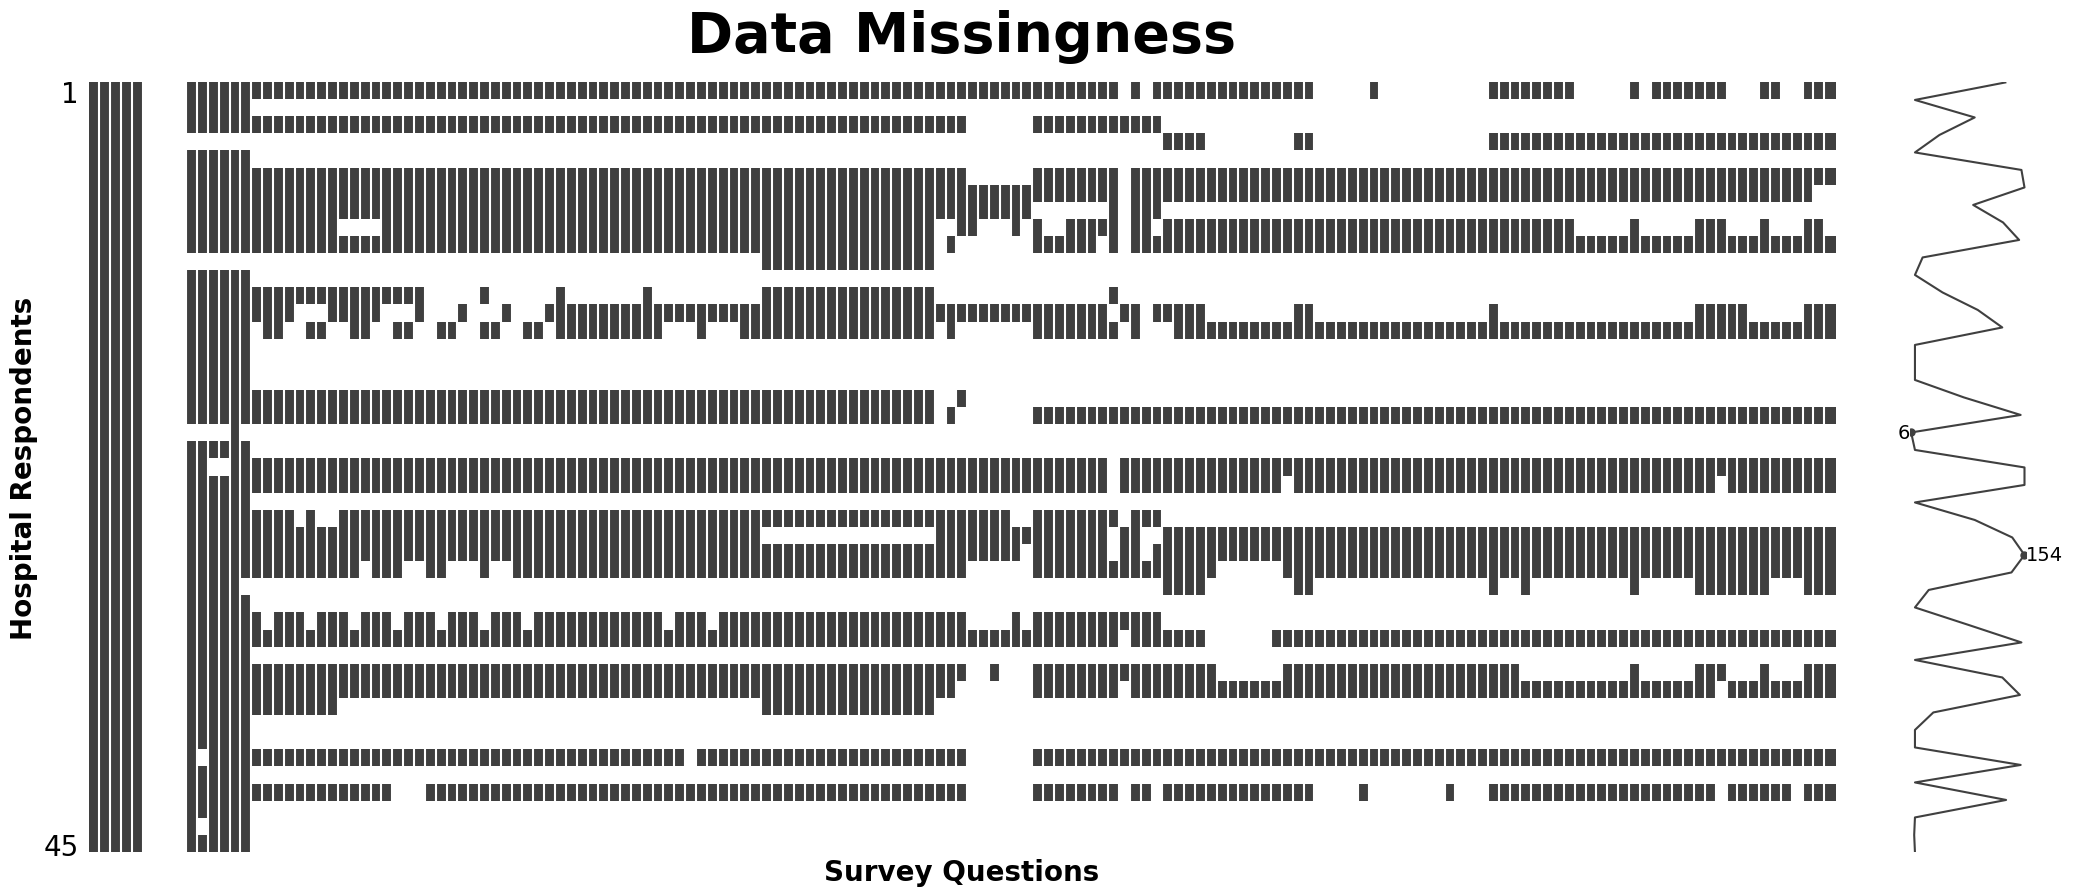

In [195]:
ut.display_missingness(single_index_df)

This shows the location of missing values in the responses.  
Some hospitals are missing many of the responses, others responded to nearly every quesions.  

Some of the questions received zero responses. These appear to be Survey Monkey generated columns and not from actual survery questions.

We will look at these columns next

In [196]:
# This function will generate list of columns that have zero values; ALL missing
columns_to_drop = ut.missingness_cols(single_index_df, 1.00)
print(f'Columns to drop: {columns_to_drop}')

Columns to drop: ['Email Address', 'First Name', 'Last Name', 'Custom Data 1']


The above columns can be safely dropped.

In [197]:
# Remove columns
clean_df = single_index_df.drop(columns_to_drop, axis = 1)

Missingness display post dropping empty columns.

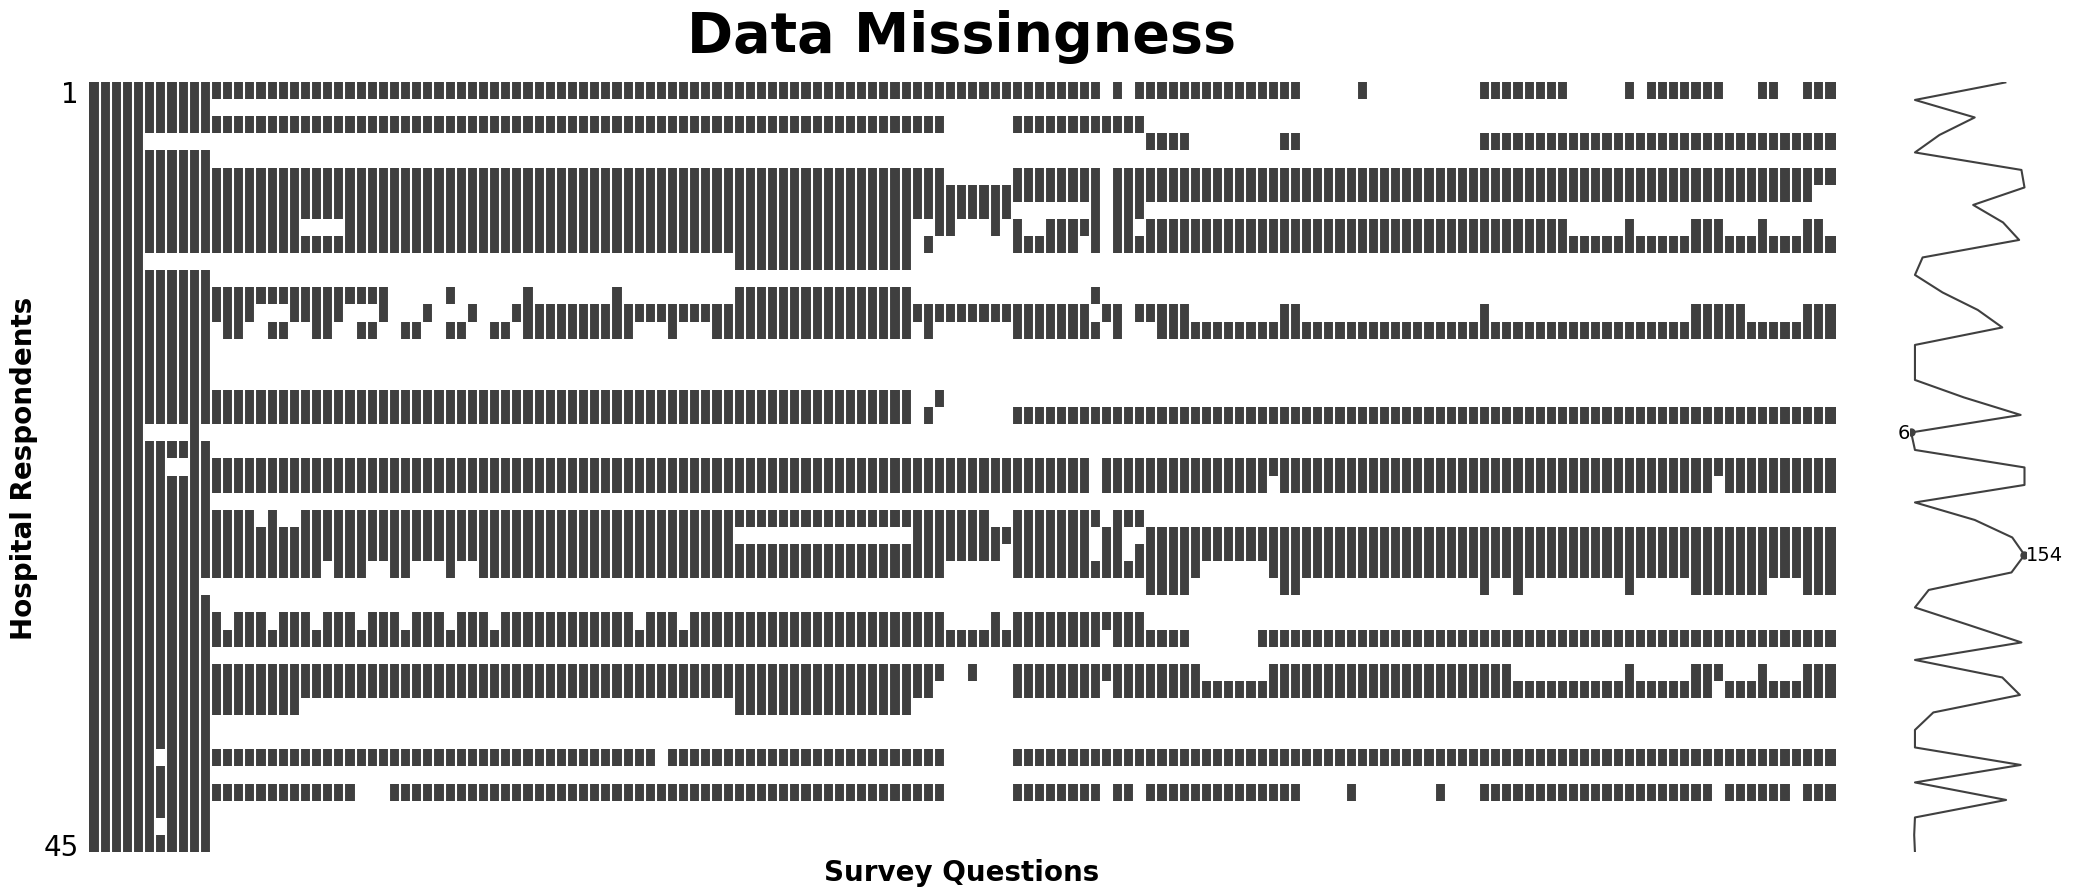

In [198]:
ut.display_missingness(clean_df)

___
### Inspect Response Proportion by Hospital  
Hospital name and address are currently in the same column so first we will parse them out

In [199]:
# Separate hospital name and address into two columns
clean_df[['Hospital: Response', 'hospital_address']] = clean_df['Hospital: Response'].str.extract(r'^(.*) \((.*)\)?$', expand = True)

# reset the name of original column
clean_df.rename(columns = {"Hospital: Response": "hospital_name"}, inplace = True)



In [200]:
# Calculate the proportion of missing values for each row
# Temporarily drop the "hospital_address" column for accuracy
missing_proportion = clean_df.drop(columns="hospital_address").isnull().mean(axis=1)

# Determine the maximum length of the hospital names for formatting
max_length = max(clean_df["hospital_name"].astype(str).apply(len))

# Display each hospital with its missing proportion
print("Proportion of missing responses for each respondent:\n")
for hospital, proportion in zip(clean_df["hospital_name"], missing_proportion):
    print(f'{hospital:<{max_length + 3}} ---> {(proportion * 100):.2f}%')

Proportion of missing responses for each respondent:

MaineGeneral Medical Center                    ---> 17.83%
MaineGeneral Medical Center                    ---> 92.99%
MaineGeneral Medical Center                    ---> 43.31%
nan                                            ---> 72.61%
St. Joseph Hospital                            ---> 92.99%
Northern Light Eastern Maine Medical Center    ---> 4.46%
Spring Harbor Hospital                         ---> 1.91%
Northern Light Eastern Maine Medical Center    ---> 44.59%
Central Maine Medical Center                   ---> 19.75%
Down East Community Hospital                   ---> 6.37%
nan                                            ---> 86.62%
Spring Harbor Hospital                         ---> 92.99%
LincolnHealth                                  ---> 70.06%
Penobscot Valley Hospital                      ---> 40.76%
Franklin Memorial Hospital                     ---> 20.38%
LincolnHealth                                  ---> 92.99%
North

In [201]:
# # find hospital names for two nans and replace based on IP Address

# # Step 1: Create a mapping from 'IP address' to 'hospital_name' (excluding NaN hospital names)
# ip_to_hospital = clean_df.dropna(subset=["hospital_name"]).set_index("IP Address")["hospital_name"].to_dict()

# # Step 2: Fill NaN values in 'hospital_name' using the mapping
# clean_df["hospital_name"] = clean_df.apply(
#     lambda row: ip_to_hospital.get(row["IP Address"], row["hospital_name"]), axis=1
# )

# # Check for NaNs in hisputal_name
# clean_df[clean_df["hospital_name"].isna()]




In [202]:
clean_df.shape

(45, 158)

In [203]:
def get_duplicated_rows(df:pd.DataFrame, col:str) -> None:
    """
    Generates an aggregation of duplicated rows

    Params:
      * df: (pd.DataFrame) - The full dataset of the hospital responses
      * col: (str) - The hosptical name column, i.e., the column of interest.

    Returns:
      * result: (pd.DataFrame) - A dataframe that contains the number of duplicated rows in the column of interest
    """
    # Display the duplicates and the values
    duplicated_counts = df[df[col].duplicated(keep=False)][col].value_counts()
    result = duplicated_counts.reset_index()
    result.columns = ["Value", "Count"]
    return result

result = get_duplicated_rows(clean_df, "hospital_name")
result

,Value,Count
0,St. Joseph Hospital,5
1,Houlton Regional Hospital,4
2,MaineGeneral Medical Center,3
3,Southern Maine Health Care-Biddeford Campus,3
4,Northern Light Eastern Maine Medical Center,2
5,Spring Harbor Hospital,2
6,Down East Community Hospital,2
7,LincolnHealth,2
8,Redington-Fairview General Hospital,2
9,Maine Medical Center,2


In [204]:
def get_list_of_unique_duplicated_rows(df:pd.DataFrame) -> None:
    """
    Generates a list of unique duplicate values, i.e., the hospitals with that contain duplicates
    """
    # Get a list of duplicated columns
    dup_hospital_name_list = list(df["Value"])
    return dup_hospital_name_list

dup_hospital_name_list = get_list_of_unique_duplicated_rows(result)
dup_hospital_name_list

['St. Joseph Hospital',
 'Houlton Regional Hospital',
 'MaineGeneral Medical Center',
 'Southern Maine Health Care-Biddeford Campus',
 'Northern Light Eastern Maine Medical Center',
 'Spring Harbor Hospital',
 'Down East Community Hospital',
 'LincolnHealth',
 'Redington-Fairview General Hospital',
 'Maine Medical Center',
 'Northern Light A.R. Gould Hospital']

In [205]:
def display_duplicated_columns_for_inspection(df:pd.DataFrame) -> None:
    """ 
    Display the duplicate rows side-by-side for comparison

    This is hard coded and can only be used MAX duplicates is <= 5.
    """
    print("-" * 80)
    print(f"DUPLICATE RESPONSES FOR: \n\t {df.iloc[0, 156]}")
    print("-" * 80)
    print()
    for i in range(df.shape[1]):
        if df.shape[0] == 2:
            print(f"Column {i}: {df.iloc[0, i]} - {df.iloc[1, i]}")
        elif df.shape[0] == 3:
            print(f"Column {i}: {df.iloc[0, i]} - {df.iloc[1, i]} - {df.iloc[2, i]}")
        elif df.shape[0] == 4:
            print(f"Column {i}: {df.iloc[0, i]} - {df.iloc[1, i]} - {df.iloc[2, i]} - {df.iloc[2, i]}")
        elif df.shape[0] == 5:
            print(f"Column {i}: {df.iloc[0, i]} - {df.iloc[1, i]} - {df.iloc[2, i]} - {df.iloc[2, i]} - {df.iloc[2, i]}")
    return None

def merge_duplicate_rows(filtered_df:pd.DataFrame, date_col:str) -> None:
    """  
    Merge duplicate rows based on hueristic.
    """
    date_format = "%m/%d/%Y %I:%M:%S %p"
    filtered_df.loc[:, date_col] = pd.to_datetime(filtered_df[date_col], format=date_format, errors='coerce')
    merged_row = {}
    for col in filtered_df.columns:
        col_values = filtered_df[col]

        # Case 1: All row values NaN
        if col_values.isna().all():
            merged_row[col] = np.nan # Set the new row value to NaN

        # Case 2: One unique value that is NaN
        else:
            unique_values = col_values.dropna().unique()
            if len(unique_values) == 1:
                merged_row[col] = unique_values[0] # Set the new to equal the only unqiue that is not NaN
            
            # Case 3: There is more than one unique non-NaN value
            else:
                # In this case, we take the value that was enter during the most recent log-in. This logic assumes the new entry is a correction; this NOT necessarily true.
                end_data_column = filtered_df[date_col] # Extract the end data column as a pd.Series
                last_log_out = end_data_column.idxmax() # Extract the index of the most recent logout.
                value_to_keep = col_values.loc[last_log_out] # Extract the value from the column of interest that corresponds to the last logout
                merged_row[col] = value_to_keep # Set the new value

    # Return the merged row
    return merged_row

def update_response_df_row_merge(hospital_duplicate_list, response_df, date_col, hospital_name_col):
    """ 
    """
    response_df_new = response_df.copy()
    for hospital in hospital_duplicate_list:

        # Extract the duplicated rows for the current hospital
        filtered_df = response_df[response_df[hospital_name_col] == hospital]

        # Merge the dupicated rows
        merged_row = merge_duplicate_rows(filtered_df, date_col)

        # Drop all the rows for the current hospital
        response_df_new.drop(response_df_new[response_df_new[hospital_name_col] == hospital].index, inplace = True)

        # Append the merged row for current hospical back to the new df
        response_df_new = pd.concat([response_df_new, pd.DataFrame([merged_row])], ignore_index=True)
    
    return response_df_new

In [206]:
clean_df.shape
clean_df[clean_df['hospital_name'].isin([
    'Northern Light Eastern Maine Medical Center',
    'Northern Light Mayo Hospital',
    'Pen Bay Medical Center'
])]

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Respondent Contact Information: Name:,Respondent Contact Information: Title/Role:,Respondent Contact Information: E-mail:,Respondent Contact Information: Phone Number:,hospital_name,...,"Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? Inpatient bed for medical management (Intrahospital)","Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? Detox/SUD/OUD Tx facility","Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? Inpatient psychiatric","Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? LTC/SNF","Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? Behavioral Health Home/PNMI/IDD Facility","Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? Other",What are the biggest factors affecting boarding patients in your emergency department? (Please describe) Factor 1:,What are the biggest factors affecting boarding patients in your emergency department? (Please describe) Factor 2:,What are the biggest factors affecting boarding patients in your emergency department? (Please describe) Factor 3:,hospital_address
5,1.186805e+11,457316537.0,08/27/2024 06:10:38 AM,08/30/2024 10:09:27 AM,198.160.5.14,Kimberly Moreau,"Director, Inpatient Care Management",kjmoreau@northernlight.org,207.973.7840,Northern Light Eastern Maine Medical Center,...,0,0,2,1,1,0,"Increased inpatient length of stay, average ab...",Lack of facilities for geriatric neurocog pati...,Not enough pediatric residential facilities in...,"489 State Street, P.O. Box 404, Bangor, ME 044..."
7,1.186813e+11,457316537.0,08/30/2024 05:58:10 AM,08/30/2024 06:17:07 AM,198.160.5.14,Kimberly Moreau,Director Care Management,kjmoreau@northernlight.org,207.973.7840,Northern Light Eastern Maine Medical Center,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"489 State Street, P.O. Box 404, Bangor, ME 044..."
16,1.186787e+11,457316537.0,08/27/2024 04:01:30 AM,08/27/2024 04:02:43 AM,198.160.5.13,Denise M. Scuderi,Vice President of Nursing and Patient Care Ser...,dscuderi@northernlight.org,2075644252,Northern Light Mayo Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"897 West Main Street, Dover-Foxcroft, ME 04426)"
22,1.186781e+11,457316537.0,08/26/2024 07:56:16 AM,08/26/2024 08:25:21 AM,71.254.100.82,Brenda Prisco,Director of Case management and UR for Pen Bay...,NaN,NaN,Pen Bay Medical Center,...,2,1,1,1,0,0,Lack of outpatient mental health and residenti...,Lack of housing,Lack of long-term care beds within the state,"Six Glen Cove Drive, Rockport, ME 04856)"


In [207]:
hospital_name_col = "hospital_name"
date_col = "End Date"
merged_df = update_response_df_row_merge(dup_hospital_name_list, clean_df, date_col, hospital_name_col)

In [208]:
merged_df.dropna(subset=['hospital_name'], inplace=True)
merged_df.shape

(25, 158)

In [209]:
merged_df

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Respondent Contact Information: Name:,Respondent Contact Information: Title/Role:,Respondent Contact Information: E-mail:,Respondent Contact Information: Phone Number:,hospital_name,...,"Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? Inpatient bed for medical management (Intrahospital)","Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? Detox/SUD/OUD Tx facility","Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? Inpatient psychiatric","Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? LTC/SNF","Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? Behavioral Health Home/PNMI/IDD Facility","Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? Other",What are the biggest factors affecting boarding patients in your emergency department? (Please describe) Factor 1:,What are the biggest factors affecting boarding patients in your emergency department? (Please describe) Factor 2:,What are the biggest factors affecting boarding patients in your emergency department? (Please describe) Factor 3:,hospital_address
1,1.186802e+11,457316537.0,08/28/2024 11:28:25 PM,08/28/2024 11:38:51 PM,73.16.24.7,John Alexander,Chief Operating Officer,alexanjo@cmhc.org,2074025140,Central Maine Medical Center,...,NaN,NaN,2,NaN,NaN,NaN,Hospital inpatient beds,Psych hospital beds,NaN,"300 Main Street, Lewiston, ME 04240)"
3,1.186788e+11,457316537.0,08/27/2024 05:55:57 AM,08/27/2024 06:34:34 AM,192.159.150.62,Lisa Oliver,Nursing Director of Emergency/Inpatient/SWING/UR,loliver@pvhme.org,2077947332,Penobscot Valley Hospital,...,1,NaN,NaN,NaN,NaN,NaN,Lack of psychiatric inpatient beds and care,Lack of acute beds statewide along with transp...,"Families ""dumping"" elderly patients in ED and ...","7 Transalpine Road, P.O. Box 368, Lincoln, ME ..."
4,1.186787e+11,457316537.0,08/27/2024 02:44:14 AM,08/27/2024 06:09:22 AM,71.254.100.90,Barbara Sergio,President,barbara.sergio@mainehealth.org,207-779-2686,Franklin Memorial Hospital,...,0,0,0,0,0,0,community resources,acceptance of goals of care by family,bed availability local SNF,"111 Franklin Health Commons, Farmington, ME 04938"
5,1.186787e+11,457316537.0,08/27/2024 04:01:30 AM,08/27/2024 04:02:43 AM,198.160.5.13,Denise M. Scuderi,Vice President of Nursing and Patient Care Ser...,dscuderi@northernlight.org,2075644252,Northern Light Mayo Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"897 West Main Street, Dover-Foxcroft, ME 04426)"
6,1.186787e+11,457316537.0,08/27/2024 03:45:30 AM,08/27/2024 03:45:57 AM,206.208.206.55,Stephany L. Jacques,President,jacquest@cmhc.org,2073691034,Rumford Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 Franklin Street, Rumford, ME 04276)"
7,1.186787e+11,457316537.0,08/27/2024 02:47:52 AM,08/27/2024 03:09:29 AM,192.159.146.18,RACHEL MANZO,RN CASE MANAGER,RMANZO@MRHME.ORG,2077237217,Millinocket Regional Hospital,...,0,0,0,0,0,0,PSYCH BEDS,MEDICAL BEDS,TRANSFER TO TERTIARY,"200 Somerset Street, Millinocket, ME 04462)"
8,1.186786e+11,457316537.0,08/27/2024 12:19:18 AM,08/27/2024 12:19:52 AM,198.160.5.14,NaN,NaN,NaN,NaN,Northern Light Acadia Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"P.O. Box 422, 268 Stillwater Avenue, Bangor, M..."
9,1.186781e+11,457316537.0,08/26/2024 07:56:16 AM,08/26/2024 08:25:21 AM,71.254.100.82,Brenda Prisco,Director of Case management and UR for Pen Bay...,NaN,NaN,Pen Bay Medical Center,...,2,1,1,1,0,0,Lack of outpatient mental health and residenti...,Lack of housing,Lack of long-term care beds within the state,"Six Glen Cove Drive, Rockport, ME 04856)"
10,1.186780e+11,457316537.0,08/26/2024 06:20:07 AM,08/26/2024 06:49:25 AM,71.254.100.82,Brenda Prisco

In [210]:
# Calculate the proportion of missing values for each row
# Temporarily drop the "hospital_address" column for accuracy
missing_proportion = merged_df.drop(columns="hospital_address").isnull().mean(axis=1)

# Determine the maximum length of the hospital names for formatting
max_length = max(merged_df["hospital_name"].astype(str).apply(len))

# Display each hospital with its missing proportion
print("Proportion of missing responses for each respondent:\n")
for hospital, proportion in zip(merged_df["hospital_name"], missing_proportion):
    print(f'{hospital:<{max_length + 3}} ---> {(proportion * 100):.2f}%')

Proportion of missing responses for each respondent:

Central Maine Medical Center                   ---> 19.75%
Penobscot Valley Hospital                      ---> 40.76%
Franklin Memorial Hospital                     ---> 20.38%
Northern Light Mayo Hospital                   ---> 92.99%
Rumford Hospital                               ---> 92.99%
Millinocket Regional Hospital                  ---> 5.10%
Northern Light Acadia Hospital                 ---> 96.18%
Pen Bay Medical Center                         ---> 1.91%
Waldo County General Hospital                  ---> 1.91%
York Hospital                                  ---> 1.91%
Northern Light Mercy Hospital                  ---> 12.74%
Mid Coast Hospital                             ---> 20.38%
Mount Desert Island Hospital                   ---> 5.73%
Stephens Memorial Hospital                     ---> 92.99%
St. Joseph Hospital                            ---> 43.31%
Houlton Regional Hospital                      ---> 10.19%
MaineGe

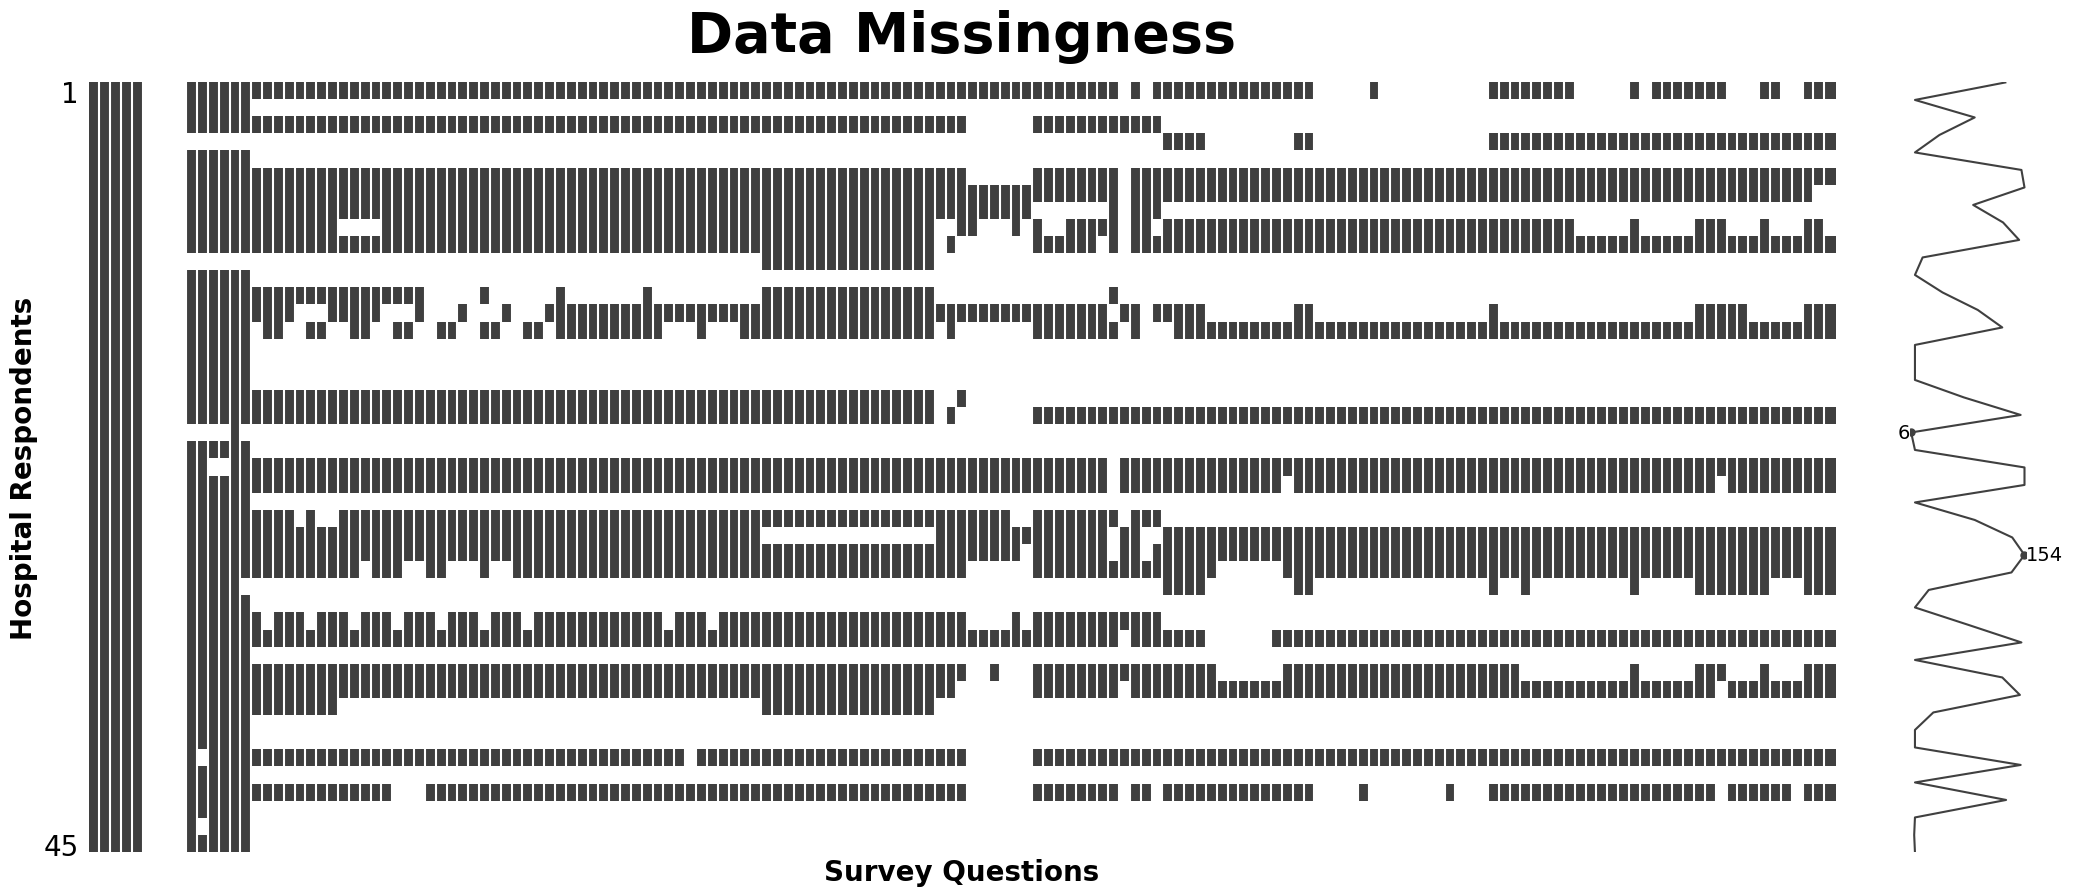

In [211]:
ut.display_missingness(single_index_df)

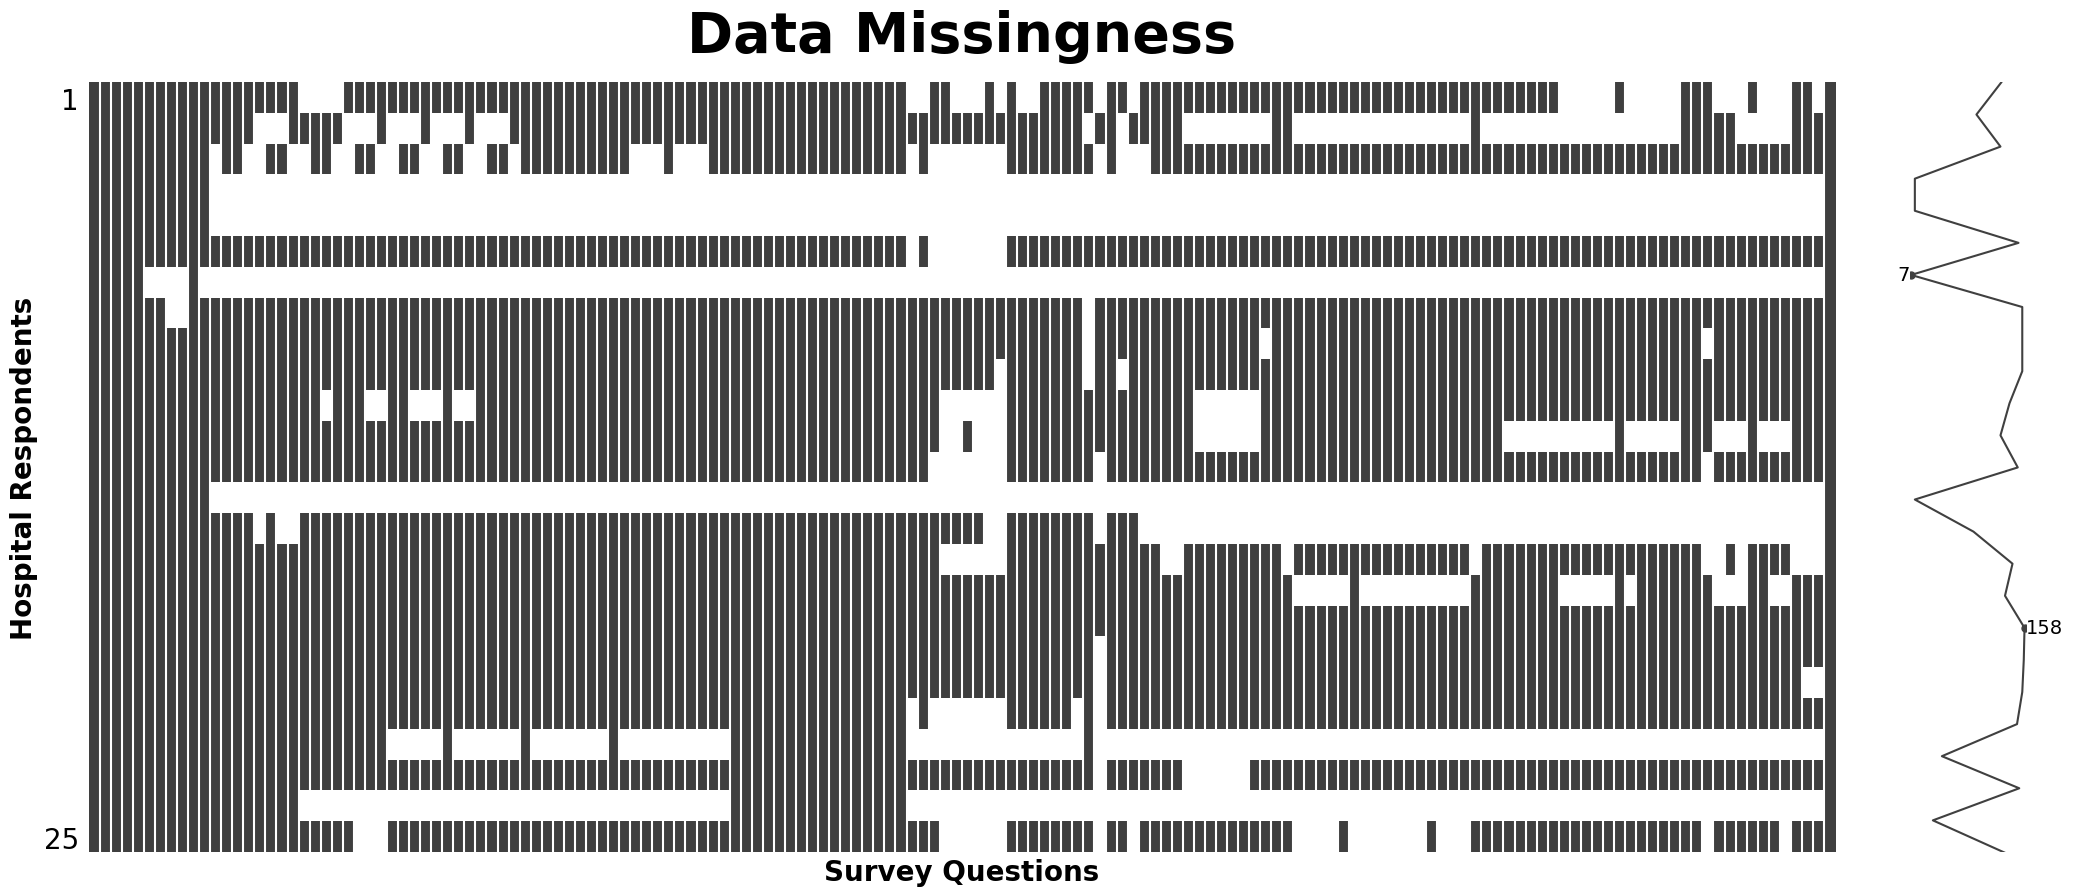

In [212]:
ut.display_missingness(merged_df)

## Assign Regions

In [213]:
hospital_region_map = {
    "hospital_name": [
        "Central Maine Medical Center", "Penobscot Valley Hospital", "Franklin Memorial Hospital",
        "Northern Light Mayo Hospital", "Rumford Hospital", "Millinocket Regional Hospital",
        "Waldo County General Hospital", "York Hospital", "Northern Light Mercy Hospital",
        "Mid Coast Hospital", "Stephens Memorial Hospital", "Houlton Regional Hospital",
        "MaineGeneral Medical Center", "Spring Harbor Hospital", "Down East Community Hospital",
        "LincolnHealth", "Redington-Fairview General Hospital", "Maine Medical Center",
        "Northern Light A.R. Gould Hospital", "Northern Light Acadia Hospital", "Pen Bay Medical Center",
        "Mount Desert Island Hospital", "St. Joseph Hospital", "Southern Maine Health Care-Biddeford Campus",
        "Northern Light Eastern Maine Medical Center"
    ],
    "county": [
        "Androscoggin", "Penobscot", "Franklin", "Piscataquis", "Oxford", "Penobscot", "Waldo", "York",
        "Cumberland", "Cumberland", "Oxford", "Aroostook", "Kennebec", "Cumberland", "Washington", "Lincoln",
        "Somerset", "Cumberland", "Aroostook", "Penobscot", "Knox", "Hancock", "Penobscot", "York", "Penobscot"
    ],
    "region": [
        3, 6, 2, 6, 2, 6, 4, 1, 1, 1, 2, 5, 3, 1, 7, 4, 3, 1, 5, 6, 4, 7, 6, 1, 6
    ]
}

hospital_region_map_df = pd.DataFrame(hospital_region_map)
hospital_region_map_df

,hospital_name,county,region
0,Central Maine Medical Center,Androscoggin,3
1,Penobscot Valley Hospital,Penobscot,6
2,Franklin Memorial Hospital,Franklin,2
3,Northern Light Mayo Hospital,Piscataquis,6
4,Rumford Hospital,Oxford,2
5,Millinocket Regional Hospital,Penobscot,6
6,Waldo County General Hospital,Waldo,4
7,York Hospital,York,1
8,Northern Light Mercy Hospital,Cumberland,1
9,Mid Coast Hospital,Cumberland,1


In [214]:
# Perform the mapping
final_df = merged_df.merge(hospital_region_map_df, on="hospital_name", how="left")
final_df

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Respondent Contact Information: Name:,Respondent Contact Information: Title/Role:,Respondent Contact Information: E-mail:,Respondent Contact Information: Phone Number:,hospital_name,...,"Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? Inpatient psychiatric","Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? LTC/SNF","Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? Behavioral Health Home/PNMI/IDD Facility","Of those patients reported in question 11, how many are awaiting beds/placements in the following settings? Other",What are the biggest factors affecting boarding patients in your emergency department? (Please describe) Factor 1:,What are the biggest factors affecting boarding patients in your emergency department? (Please describe) Factor 2:,What are the biggest factors affecting boarding patients in your emergency department? (Please describe) Factor 3:,hospital_address,county,region
0,1.186802e+11,457316537.0,08/28/2024 11:28:25 PM,08/28/2024 11:38:51 PM,73.16.24.7,John Alexander,Chief Operating Officer,alexanjo@cmhc.org,2074025140,Central Maine Medical Center,...,2,NaN,NaN,NaN,Hospital inpatient beds,Psych hospital beds,NaN,"300 Main Street, Lewiston, ME 04240)",Androscoggin,3
1,1.186788e+11,457316537.0,08/27/2024 05:55:57 AM,08/27/2024 06:34:34 AM,192.159.150.62,Lisa Oliver,Nursing Director of Emergency/Inpatient/SWING/UR,loliver@pvhme.org,2077947332,Penobscot Valley Hospital,...,NaN,NaN,NaN,NaN,Lack of psychiatric inpatient beds and care,Lack of acute beds statewide along with transp...,"Families ""dumping"" elderly patients in ED and ...","7 Transalpine Road, P.O. Box 368, Lincoln, ME ...",Penobscot,6
2,1.186787e+11,457316537.0,08/27/2024 02:44:14 AM,08/27/2024 06:09:22 AM,71.254.100.90,Barbara Sergio,President,barbara.sergio@mainehealth.org,207-779-2686,Franklin Memorial Hospital,...,0,0,0,0,community resources,acceptance of goals of care by family,bed availability local SNF,"111 Franklin Health Commons, Farmington, ME 04938",Franklin,2
3,1.186787e+11,457316537.0,08/27/2024 04:01:30 AM,08/27/2024 04:02:43 AM,198.160.5.13,Denise M. Scuderi,Vice President of Nursing and Patient Care Ser...,dscuderi@northernlight.org,2075644252,Northern Light Mayo Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"897 West Main Street, Dover-Foxcroft, ME 04426)",Piscataquis,6
4,1.186787e+11,457316537.0,08/27/2024 03:45:30 AM,08/27/2024 03:45:57 AM,206.208.206.55,Stephany L. Jacques,President,jacquest@cmhc.org,2073691034,Rumford Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 Franklin Street, Rumford, ME 04276)",Oxford,2
5,1.186787e+11,457316537.0,08/27/2024 02:47:52 AM,08/27/2024 03:09:29 AM,192.159.146.18,RACHEL MANZO,RN CASE MANAGER,RMANZO@MRHME.ORG,2077237217,Millinocket Regional Hospital,...,0,0,0,0,PSYCH BEDS,MEDICAL BEDS,TRANSFER TO TERTIARY,"200 Somerset Street, Millinocket, ME 04462)",Penobscot,6
6,1.186786e+11,457316537.0,08/27/2024 12:19:18 AM,08/27/2024 12:19:52 AM,198.160.5.14,NaN,NaN,NaN,NaN,Northern Light Acadia Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"P.O. Box 422, 268 Stillwater Avenue, Bangor, M...",Penobscot,6
7,1.186781e+11,457316537.0,08/26/2024 07:56:16 AM,08/26/2024 08:25:21 AM,71.254.100.82,Brenda Prisco,Director of Case management and UR for Pen Bay...,NaN,NaN,Pen Bay Medical Center,...,1,1,0,0,Lack of outpatient mental health and residenti...,Lack of housing,Lack of long-term care beds within the state,"Six Glen Cove Drive, Rockport, ME 04856)",Knox,4
8,1.186780e+11,457316537.0,08/26/2024 06:20:07 AM,08/26/2024 06:49:25 AM,71.254.100.82,Brenda Prisco,Coastal Director for Waldo County General Hosp...,Brenda.Prisco@mainehealth.org,207-505-4694,Waldo County General Hospital,...,0,3,0,0,Increasing homelessness with lack of housing,Lack of long term care bed availability,Difficulty in obtaining

In [215]:
# Find unmatched hospitals
dict_hospitals = set(merged_df["hospital_name"])  
df_hospitals = set(hospital_region_map_df["hospital_name"])        
# Find hospitals in the dictionary that are not in the DataFrame
unmatched_hospitals = df_hospitals - dict_hospitals
unmatched_hospitals

set()

In [216]:
DATA_FOLDER = PROJECT_HOME / "survey_data" / "CSV"
DATA_FILE = "response_data_clean.csv"
final_df.to_csv(str(DATA_FOLDER / DATA_FILE))